# Análisis exploratorio de datos SIAP y SNIIM

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import datetime
import geopandas
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Para que no se desplieguen las advertencias
warnings.filterwarnings("ignore")

## SIAP 

In [3]:
# URL al archivo parquet en el repositorio
url_siap = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Segunda parte\Tidy_preprocessed\SIAP_preprocessed.parquet'
# Cargar archivo parquet como DataFrame
df_siap = pd.read_parquet(url_siap)
# Inspeccionar primeros elementos del DataFrame
df_siap.head()

,Entidad,Municipio,Superficie Sembrada Acumulada,Superficie Cosechada Acumulada,Superficie Siniestrada Acumulada,Produccion Acumulada,Rendimiento,Año,Mes,Cultivo,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion
0,Baja California Sur,La Paz,8.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,8.0,0.0,0.0,0.0
1,Baja California Sur,Los Cabos,3.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,3.0,0.0,0.0,0.0
2,Morelos,Miacatlán,0.4,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,0.4,0.0,0.0,0.0
3,Nayarit,Santiago Ixcuintla,60.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,60.0,0.0,0.0,0.0
4,Quintana Roo,Bacalar,12.5,10.0,0.0,49.0,4.9,2020,Enero,Berenjena,12.5,10.0,0.0,49.0


### Pandas Profiling

In [4]:
# Código para visualizar mejor los reportes en jupyter
# !jupyter nbextension enable --py widgetsnbextension

In [5]:
# pip install ydata-profiling

In [6]:
# # Código para obtener un super resumen automático de los datos
# from ydata_profiling import ProfileReport

# siap_profile = ProfileReport(df_siap, title="Pandas Profiling Report - SIAP")
# siap_profile.to_notebook_iframe()

In [7]:
#Exportamos el reporte a un archivo html que es guardado en la misma carpeta. 
#siap_profile.to_file('siap-profiling-report')

## SNIIM mensual

In [8]:
# URL al archivo parquet en el repositorio
url_sniim = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Segunda parte\Tidy_preprocessed\SNIIM_preprocessed_mensual.parquet'
# Cargar archivo parquet como DataFrame
df_sniim = pd.read_parquet(url_sniim)
# Inspeccionar primeros elementos del DataFrame
df_sniim.head()

,Fecha,Origen,Destino,Cultivo SIAP,Precio Minimo,Precio Maximo,Precio Frecuente,Año,Mes
0,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Brócoli,12.00,14.00,13.00,2020,Enero
1,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Calabacita,11.33,12.67,12.00,2020,Enero
2,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Coliflor,13.00,15.00,14.00,2020,Enero
3,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Guayaba,8.75,9.58,9.17,2020,Enero
4,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Lechuga,6.00,8.00,7.00,2020,Enero


### Pandas Profiling

In [9]:
# sniim_profile = ProfileReport(df_sniim, title="Pandas Profiling Report - SNIIM")
# sniim_profile.to_notebook_iframe()

#Exportamos el reporte a un archivo html que es guardado en la misma carpeta. 
#sniim_profile.to_file('sniim-profiling-report')

## Relaciones entre variables por visualización

### Definición de constantes

In [10]:
# Orden cronológico de los meses
MESES_CRONOLOGICO = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Lista de colores para cada año
COLORES = ['#ffd343', '#42ff75', '#426eff', '#ff42cc']

# Lista de cultivos únicos
CULTIVOS_UNICOS = list(df_siap['Cultivo'].unique())

# Lista de años únicos
AÑOS_UNICOS = list(df_siap['Año'].unique())

# Lista de estado únicos
ESTADOS_UNICOS = list(df_siap['Entidad'].unique())

# Lista de estado únicos
MUNICIPIOS_UNICOS = list(df_siap['Municipio'].unique())

# Lista de variables numéricas SIAP
VARIABLES_NUMERICAS_SIAP = ["Superficie Sembrada", "Superficie Cosechada", "Superficie Siniestrada", "Produccion", "Rendimiento",
                             "Superficie Sembrada Acumulada", "Superficie Cosechada Acumulada", "Superficie Siniestrada Acumulada", "Produccion Acumulada"]

# Lista de variables numéricas SNIIM
VARIABLES_NUMERICAS_SNIIM = ["Precio Minimo", "Precio Maximo", "Precio Frecuente"]

In [11]:
# Magic command para hacer gráficas interactivas
#%matplotlib widget

### Análisis temporal: ¿En qué épocas del año es más probable que se generen excedentes? 

Analizamos la evolución de las variables númericas a lo largo de los años, para cada uno de los cultivos de interés. Para esto, vamos a ignorar la información geográfica, promediando los valores a lo largo de todos los municipios y estados. Hacemos esto para las variables mensuales y acumuladas del SIAP por un lado, y para los precios del SNIIM por el otro.

In [12]:
#SIAP mensual

# Sumamos los valores de todos los municipios y estados, agrupados por año, mes y cultivo
df_siap_año_mes_cult = df_siap.groupby(['Año', 'Mes', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[:5]].sum().reset_index()

#SIAP acumulado

# Sumamos los valores de todos los municipios y estados, agrupados por año, mes y cultivo
df_siap_año_mes_cult_cum = df_siap.groupby(['Año', 'Mes', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[5:]].sum().reset_index()

# SNIIM mensual

df_sniim_año_mes_cult = df_sniim.groupby(['Año', 'Mes', 'Cultivo SIAP'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

In [13]:
# Inspeccionar agrupamiento SIAP
df_siap_año_mes_cult.head()

,Año,Mes,Cultivo,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento
0,2020,Enero,Berenjena,1501.86,1083.23,0.0,50678.27,208.30
1,2020,Enero,Brócoli,14945.06,1552.31,0.0,24946.08,465.74
2,2020,Enero,Calabacita,0.00,0.00,0.0,0.00,0.00
3,2020,Enero,Cebolla,18665.86,3440.00,0.0,54117.52,378.11
4,2020,Enero,Chile verde,30093.30,8824.70,50.5,254457.15,637.69


In [14]:
# Inspeccionar agrupamiento SIAP acumulado
df_siap_año_mes_cult_cum.head()

,Año,Mes,Cultivo,Superficie Sembrada Acumulada,Superficie Cosechada Acumulada,Superficie Siniestrada Acumulada,Produccion Acumulada
0,2020,Enero,Berenjena,1501.86,1083.23,0.0,50678.27
1,2020,Enero,Brócoli,14945.06,1552.31,0.0,24946.08
2,2020,Enero,Calabacita,0.00,0.00,0.0,0.00
3,2020,Enero,Cebolla,18665.86,3440.00,0.0,54117.52
4,2020,Enero,Chile verde,30093.30,8824.70,50.5,254457.15


In [15]:
# Inspeccionar agrupamiento SNIIM
df_sniim_año_mes_cult.head()

,Año,Mes,Cultivo SIAP,Precio Minimo,Precio Maximo,Precio Frecuente
0,2020,Abril,Berenjena,21.394737,24.315789,22.684211
1,2020,Abril,Brócoli,14.162667,17.029333,16.150167
2,2020,Abril,Calabacita,12.786066,14.218066,13.226230
3,2020,Abril,Cebolla,12.418579,14.446115,13.093476
4,2020,Abril,Chile verde,36.476836,40.412747,38.589654


Definir función para especificar los labels de los ejes de las gráficas.

In [16]:
# Función para obtener la etiqueta del eje y según el tipo de variable
def get_label(variable):
    if variable in ['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada', 'Superficie Sembrada Acumulada', 'Superficie Cosechada Acumulada', 'Superficie Siniestrada Acumulada'
                    'Superficie Sembrada Anual', 'Superficie Cosechada Anual', 'Superficie Siniestrada Anual']:
        return 'Hectáreas'
    elif variable in ['Precio Minimo', 'Precio Maximo', 'Precio Frecuente', 'Precio Minimo Anual', 'Precio Maximo Anual', 'Precio Frecuente Anual']:
        return 'Pesos'
    elif variable in ['Produccion', 'Produccion Acumulada', 'Produccion Anual']:
        return 'Toneladas'
    elif variable in ['Rendimiento', 'Rendimiento Anual']:
        return 'Tonelada/Hectárea'
    else:
        return ''

#### Gráfica de valores mensuales de las distintas variables y cultivos

In [17]:
# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico según el cultivo y variable seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Seleccionar el DataFrame correspondiente según la variable
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_año_mes_cult
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_año_mes_cult
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Graficar la producción promedio de todos los cultivos
        sns.barplot(x='Mes', y=variable, hue='Año', data=data, palette=COLORES, ci=False, estimator='mean')
        title = f'{variable} promedio de Todos los Cultivos por mes y año'
    else:
        # Seleccionar el DataFrame correspondiente según la variable y cultivo
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_año_mes_cult[df_siap_año_mes_cult['Cultivo'] == cultivo]
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_año_mes_cult[df_sniim_año_mes_cult['Cultivo SIAP'] == cultivo]
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Graficar la producción del cultivo seleccionado
        sns.barplot(x='Mes', y=variable, hue='Año', data=data, palette=COLORES, ci=False)
        title = f'{variable} de {cultivo} por mes y año'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')

    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_unicos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable)>

#### Gráfica de valores acumulados de las distintas variables y cultivos

Para facilitar el análisis comparativo entre los distintos años, repetimos la gráfica pero ahora de manera acumulada. Esto no solo facilita comparar los patrones de evolución a lo largo de cada año, sino que permite comparar los valores totales de cada año simplemente inspeccionando el mes de Diciembre. 

In [18]:
# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico según el cultivo y variable seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Graficar la producción promedio de todos los cultivos
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_siap_año_mes_cult_cum, palette=COLORES, ci=False, estimator='mean')
        title = f'{variable} Promedio de Todos los Cultivos por mes y año'
    else:
        # Graficar la producción del cultivo seleccionado
        sns.barplot(x='Mes', y=variable, hue='Año', data=df_siap_año_mes_cult_cum[df_siap_año_mes_cult_cum['Cultivo'] == cultivo], palette=COLORES, ci=False)
        title = f'{variable} de {cultivo} por mes y año'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')

    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[4:], value='Produccion Acumulada', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable)>

Habiendo analizado el patrón de evolución a lo largo de los meses de los distintos años, procedemos a identificar cuáles son, en promedio, los meses con mejores métricas.

In [19]:
# Promediar los valores entre todos los años
df_siap_promedio_anual = df_siap_año_mes_cult.groupby('Mes')[VARIABLES_NUMERICAS_SIAP[:5]].mean().reset_index()
df_sniim_promedio_anual = df_sniim_año_mes_cult.groupby('Mes')[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

#### Gráfica de mejores meses en términos de las distintas variables y cultivos

In [20]:
# Función para actualizar el gráfico de barras horizontales según la variable y el cultivo seleccionados
def update_plot(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Seleccionar el DataFrame correspondiente según la variable
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_promedio_anual
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_promedio_anual
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Graficar barras horizontales para el promedio de todos los cultivos
        order = data.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=data, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para todos los cultivos por mes'
    else:
        # Seleccionar el DataFrame correspondiente según la variable y cultivo
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_año_mes_cult[df_siap_año_mes_cult['Cultivo'] == cultivo]
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_año_mes_cult[(df_sniim_año_mes_cult['Cultivo SIAP'] == cultivo)]
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = data.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=data, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para {cultivo} por mes'

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Anual')
    plt.ylabel('Mes')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
#cultivo_sniim_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo SNIIM')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Produccion', description='Variable')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable)>

Procedemos a analizar la evolución de las distintas variables numéricas pero ahora a lo largo de todo el periodo del que se tienen datos. Prestamos especial interés a los meses identificados con mejores y peores métricas.

In [21]:
# Creamos una copia de nuestros DataFrames
df_siap_fechas = df_siap.copy()
df_sniim_fechas = df_sniim.copy()

# Asegúrate de tener las columnas Año y Mes en formato string y maneja NaN
df_siap_fechas['Año'] = df_siap_fechas['Año'].astype(str)
df_siap_fechas['Mes'] = df_siap_fechas['Mes'].astype(str)
df_sniim_fechas['Año'] = df_sniim_fechas['Año'].astype(str)
df_sniim_fechas['Mes'] = df_sniim_fechas['Mes'].astype(str)

# Mapea los nombres de los meses a números
meses_dict = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Mapea los nombres de los meses a números
df_siap_fechas['Mes'] = df_siap_fechas['Mes'].map(meses_dict)
df_sniim_fechas['Mes'] = df_sniim_fechas['Mes'].map(meses_dict)

# Combina las columnas Año y Mes en una nueva columna 'Fecha'
df_siap_fechas['Fecha'] = pd.to_datetime(df_siap_fechas['Año'] + '-' + df_siap_fechas['Mes'].astype(str), format='%Y-%m')
df_sniim_fechas['Fecha'] = pd.to_datetime(df_sniim_fechas['Año'] + '-' + df_sniim_fechas['Mes'].astype(str), format='%Y-%m')

# Agrupa por mes y año y calcula el promedio de las columnas numéricas
df_siap_grouped = df_siap_fechas.groupby(['Fecha', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[:5]].mean().reset_index()
df_sniim_grouped = df_sniim_fechas.groupby(['Fecha', 'Cultivo SIAP'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

# Filtra los datos para el rango de fechas que deseas
start_date = '2019-12-25'
end_date = '2023-09-10'
df_siap_filtered = df_siap_grouped[(df_siap_grouped['Fecha'] >= start_date) & (df_siap_grouped['Fecha'] <= end_date)]
df_sniim_filtered = df_sniim_grouped[(df_sniim_grouped['Fecha'] >= start_date) & (df_sniim_grouped['Fecha'] <= end_date)]

#### Gráfica de evolución de las distintas variables y cultivos a lo largo del tiempo

In [22]:
# Función para graficar
def plot_graph(cultivo, variable):
    plt.subplots(1, 1, figsize=(12, 8))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable para todos los cultivos
        if variable in VARIABLES_NUMERICAS_SIAP:
            df_all_cultivos_var = df_siap_filtered.groupby('Fecha')[variable].mean().reset_index()
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            df_all_cultivos_var = df_sniim_filtered.groupby('Fecha')[variable].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable} no es válida.")
            
        # Asignar colores según la lista COLORES
        unique_years = df_all_cultivos_var['Fecha'].dt.year.unique()
        color_palette = COLORES[:len(unique_years)]
        
        for i, year in enumerate(unique_years):
            df_year = df_all_cultivos_var[df_all_cultivos_var['Fecha'].dt.year.isin((year, year+1))]
            plt.plot(df_year['Fecha'], df_year[variable], marker='o', linestyle='-', color=color_palette[i], label=f'{year}')

        # Añadir título
        plt.title(f'{variable} de todos los cultivos', pad=30, fontsize=16, fontweight='bold', va='center')

    else:
        # Filtra por el cultivo seleccionado y utiliza el DataFrame correspondiente
        if variable in VARIABLES_NUMERICAS_SIAP:
            df_cultivo = df_siap_filtered[df_siap_filtered['Cultivo'] == cultivo]
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            df_cultivo = df_sniim_filtered[df_sniim_filtered['Cultivo SIAP'] == cultivo]
        else:
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Asignar colores según la lista COLORES
        unique_years = df_cultivo['Fecha'].dt.year.unique()
        color_palette = COLORES[:len(unique_years)]
        
        for i, year in enumerate(unique_years):
            df_year = df_cultivo[df_cultivo['Fecha'].dt.year.isin((year, year+1))]
            plt.plot(df_year['Fecha'], df_year[variable], marker='o', linestyle='-', color=color_palette[i], label=f'{year}')
        
        # Añadir título
        plt.title(f'{variable} de {cultivo}', pad=30)

    # Etiquetas para el eje y
    plt.ylabel(get_label(variable), labelpad=20)

    plt.xlabel('Fecha', labelpad=20)
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
    
    # Añadir leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable=widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Superficie Sembrada', description='Variable'))


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable)>

Podemos inspeccionar simultaneamente la evolución de las distintas parejas de variables numéricas en busca de alguna relación significativa.

In [23]:
# Función para graficar
def plot_graph(cultivo, variable1, variable2):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable1 para todos los cultivos
        if variable1 in VARIABLES_NUMERICAS_SIAP:
            df_all_cultivos_var1 = df_siap_filtered.groupby(['Fecha'])[variable1].mean().reset_index()
        elif variable1 in VARIABLES_NUMERICAS_SNIIM:
            df_all_cultivos_var1 = df_sniim_filtered.groupby(['Fecha'])[variable1].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable1} no es válida.")
        
        # Asignar colores a cada año
        for i, year in enumerate(df_all_cultivos_var1['Fecha'].dt.year.unique()):
            df_year = df_all_cultivos_var1[df_all_cultivos_var1['Fecha'].dt.year.isin((year, year + 1))]
            axs[0].plot(df_year['Fecha'], df_year[variable1], marker='o', linestyle='-', color=COLORES[i], label=f'{year}')

        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Grafica el promedio de la variable2 para todos los cultivos
        if variable2 in VARIABLES_NUMERICAS_SIAP:
            df_all_cultivos_var2 = df_siap_filtered.groupby(['Fecha'])[variable2].mean().reset_index()
        elif variable2 in VARIABLES_NUMERICAS_SNIIM:
            df_all_cultivos_var2 = df_sniim_filtered.groupby(['Fecha'])[variable2].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable2} no es válida.")
        
        # Asignar colores a cada año
        for i, year in enumerate(df_all_cultivos_var2['Fecha'].dt.year.unique()):
            df_year = df_all_cultivos_var2[df_all_cultivos_var2['Fecha'].dt.year.isin((year, year + 1))]
            axs[1].plot(df_year['Fecha'], df_year[variable2], marker='o', linestyle='-', color=COLORES[i], label='_')

        axs[1].legend(loc='upper right')
        
        # Calcular la correlación
        corr_value = df_all_cultivos_var1[variable1].corr(df_all_cultivos_var2[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.505, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=18, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    else:
        # Filtra por el cultivo seleccionado
        if variable1 in VARIABLES_NUMERICAS_SIAP:
            df_cultivo_var1 = df_siap_filtered[df_siap_filtered['Cultivo'] == cultivo].groupby(['Fecha'])[variable1].mean().reset_index()
        elif variable1 in VARIABLES_NUMERICAS_SNIIM:
            df_cultivo_var1 = df_sniim_filtered[df_sniim_filtered['Cultivo SIAP'] == cultivo].groupby(['Fecha'])[variable1].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable1} no es válida.")
        
        # Asignar colores a cada año
        for i, year in enumerate(df_cultivo_var1['Fecha'].dt.year.unique()):
            df_year = df_cultivo_var1[df_cultivo_var1['Fecha'].dt.year.isin((year, year + 1))]
            axs[0].plot(df_year['Fecha'], df_year[variable1], marker='o', linestyle='-', color=COLORES[i], label=f'{year}')

        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Filtra por el cultivo seleccionado
        if variable2 in VARIABLES_NUMERICAS_SIAP:
            df_cultivo_var2 = df_siap_filtered[df_siap_filtered['Cultivo'] == cultivo].groupby(['Fecha'])[variable2].mean().reset_index()
        elif variable2 in VARIABLES_NUMERICAS_SNIIM:
            df_cultivo_var2 = df_sniim_filtered[df_sniim_filtered['Cultivo SIAP'] == cultivo].groupby(['Fecha'])[variable2].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable2} no es válida.")
        
        # Asignar colores a cada año
        for i, year in enumerate(df_cultivo_var2['Fecha'].dt.year.unique()):
            df_year = df_cultivo_var2[df_cultivo_var2['Fecha'].dt.year.isin((year, year + 1))]
            axs[1].plot(df_year['Fecha'], df_year[variable2], marker='o', linestyle='-', color=COLORES[i], label='_')
        
        axs[1].legend(loc='upper right')

        # Calcular la correlación
        corr_value = df_cultivo_var1[variable1].corr(df_cultivo_var2[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.515, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=14, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    # Etiquetas para el eje y
    axs[0].set_ylabel(get_label(variable1))
    axs[1].set_ylabel(get_label(variable2))

    plt.xlabel('Fecha')
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(df_siap_filtered['Fecha'].min(), df_siap_filtered['Fecha'].max())
        
    plt.show()

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable1=widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Superficie Sembrada', description='Variable 1'),
         variable2=widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Superficie Cosechada', description='Variable 2'))


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable1, variable2)>

### Análisis geográfico: ¿En qué ubicaciones es más probable que se generen excedentes? 

Anteriornmente ignoramos la información geográfica de nuestros datos, promediando los valores a lo largo de todo el territorio nacional. A continuación, ahondaremos en la geografía de nuestros datos, con el objetivo de identificar en que localidades es más plausible que se generen excedentes de los distintos cultivos.

Intentando pasar de lo general a lo más específico, como primer paso evaluaremos cómo fluctuan los valores de nuestras distintas variables numéricas en los distintos estados de México.

In [24]:
# SIAP acumulado

# Agrupación para el año 2023 hasta septiembre
df_siap_2023_hasta_septiembre = df_siap[(df_siap['Año'] == 2023) & (df_siap['Mes'] == 'Septiembre')].groupby(['Año', 'Entidad', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[4:]].sum().reset_index()

# Agrupación para los demás años y diciembre
df_siap_resto = df_siap[~(df_siap['Año'] == 2023) & (df_siap['Mes'] == 'Diciembre')].groupby(['Año', 'Entidad', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[4:]].sum().reset_index()

# Concatenar los resultados
df_siap_año_est_cult = pd.concat([df_siap_resto, df_siap_2023_hasta_septiembre], ignore_index=True)

# Cambiar el nombre de las columnas
df_siap_año_est_cult.rename(columns={'Superficie Sembrada Acumulada': 'Superficie Sembrada Anual', 'Superficie Cosechada Acumulada': 'Superficie Cosechada Anual', 'Superficie Siniestrada Acumulada': 'Superficie Siniestrada Anual', 'Produccion Acumulada': 'Produccion Anual', 'Rendimiento':'Rendimiento Anual'}, inplace=True)

# SNIIM mensual

# Promediamos los valores de todos los municipios y meses, agrupados por año, estado y cultivo
df_sniim_año_est_cult = df_sniim.groupby(['Año', 'Origen', 'Cultivo SIAP'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

# Cambiar el nombre de la columnas
df_sniim_año_est_cult.rename(columns={'Precio Maximo': 'Precio Maximo Anual', 'Precio Minimo': 'Precio Minimo Anual', 'Precio Frecuente': 'Precio Frecuente Anual'}, inplace=True)


In [25]:
# Inspeccionar agrupamiento SIAP
df_siap_año_est_cult.head()

,Año,Entidad,Cultivo,Rendimiento Anual,Superficie Sembrada Anual,Superficie Cosechada Anual,Superficie Siniestrada Anual,Produccion Anual
0,2020,Aguascalientes,Brócoli,140.69,914.00,914.00,0.0,16345.51
1,2020,Aguascalientes,Cebolla,206.67,451.50,451.50,0.0,14016.76
2,2020,Aguascalientes,Chile verde,243.23,878.65,878.65,0.0,17920.50
3,2020,Aguascalientes,Coliflor,102.95,269.00,269.00,0.0,7519.00
4,2020,Aguascalientes,Durazno,86.55,387.75,331.55,0.0,7701.09


In [26]:
# Inspeccionar agrupamiento SNIIM
df_sniim_año_est_cult.head()

,Año,Origen,Cultivo SIAP,Precio Minimo Anual,Precio Maximo Anual,Precio Frecuente Anual
0,2020,Aguascalientes,Berenjena,38.000000,40.000000,39.000000
1,2020,Aguascalientes,Brócoli,8.870558,10.558376,9.708122
2,2020,Aguascalientes,Calabacita,14.529933,15.441116,15.092594
3,2020,Aguascalientes,Coliflor,8.624365,10.624365,9.624365
4,2020,Aguascalientes,Guayaba,8.856396,10.025178,9.439086


Utilizamos geopandas para graficar sobre un mapa de México empleando un mapa de calor

In [27]:
# Cargamos los datos con la información geográfica
df_geo = geopandas.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")

# Inspeccionamos los datos
df_geo.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


In [28]:
# Evaluamos qué nombres de estado en el sniim no están en el siap
print('Estados del SNIIM no presentes en el SIAP:\n')
for estado_geo in df_geo['name'].unique():
    if estado_geo not in df_siap['Entidad'].unique():
        print(estado_geo)

Estados del SNIIM no presentes en el SIAP:

Distrito Federal


In [29]:
# Crear copia del dataframe
df_geo_name = df_geo.copy()

# Reemplazamos Distrito Federal por Ciudad de México
condicion = df_geo_name['name'] == "Distrito Federal"
df_geo_name.loc[condicion, 'name'] = "Ciudad de México" 

In [30]:
# Obtener la lista de variables numéricas anuales de ambos dataframes
variables_siap_anual = ['Superficie Sembrada Anual', 'Superficie Cosechada Anual', 'Superficie Siniestrada Anual', 'Produccion Anual', 'Rendimiento Anual']
variables_sniim_anual = ['Precio Minimo Anual', 'Precio Maximo Anual', 'Precio Frecuente Anual']

In [31]:
# Función para graficar el mapa
def plot_map(cultivo_seleccionado, variable_seleccionada_siap, variable_seleccionada_sniim):
    # Mapa izquierdo (siap)
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_siap = df_geo.merge(df_siap_año_est_cult.groupby('Entidad')[variable_seleccionada_siap].mean().reset_index(), left_on='name', right_on='Entidad', how='left')
    else:
        gdf_cultivo = df_siap_año_est_cult[df_siap_año_est_cult['Cultivo'] == cultivo_seleccionado]
        gdf_siap = df_geo.merge(gdf_cultivo, left_on='name', right_on='Entidad', how='left')

    # Rellenar los valores nulos con 0
    gdf_siap[variable_seleccionada_siap] = gdf_siap[variable_seleccionada_siap].fillna(0)

    # Crear un mapa de calor con escala ajustada
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    # Verificar si se trata de 'Todos los cultivos'
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_siap.plot(column=variable_seleccionada_siap, ax=ax[0], legend=True, cmap='YlOrRd')
    else:
        gdf_siap.plot(column=variable_seleccionada_siap, ax=ax[0], legend=True, cmap='YlOrRd')

    # Dibujar las fronteras del GeoDataFrame con bordes negros y delgados
    gdf_siap.boundary.plot(ax=ax[0], color='black', linewidth=0.5)

    # Personalizar el mapa
    ax[0].set_title(f"{variable_seleccionada_siap} por estado ({cultivo_seleccionado})")
    ax[0].set_axis_off()

    # Añadir leyenda si existe
    legend_siap = ax[0].get_legend()
    if legend_siap:
        legend_siap.set_title(variable_seleccionada_siap)

    # Mapa derecho (sniim)
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_sniim = df_geo.merge(df_sniim_año_est_cult.groupby('Origen')[variable_seleccionada_sniim].mean().reset_index(), left_on='name', right_on='Origen', how='left')
    else:
        gdf_cultivo_sniim = df_sniim_año_est_cult[df_sniim_año_est_cult['Cultivo SIAP'] == cultivo_seleccionado]
        gdf_sniim = df_geo.merge(gdf_cultivo_sniim, left_on='name', right_on='Origen', how='left')

    # Rellenar los valores nulos con 0
    gdf_sniim[variable_seleccionada_sniim] = gdf_sniim[variable_seleccionada_sniim].fillna(0)

    # Verificar si se trata de 'Todos los cultivos'
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_sniim.plot(column=variable_seleccionada_sniim, ax=ax[1], legend=True, cmap='YlOrRd')
    else:
        gdf_sniim.plot(column=variable_seleccionada_sniim, ax=ax[1], legend=True, cmap='YlOrRd')

    # Dibujar las fronteras del GeoDataFrame con bordes negros y delgados
    gdf_sniim.boundary.plot(ax=ax[1], color='black', linewidth=0.5)

    # Personalizar el mapa
    ax[1].set_title(f"{variable_seleccionada_sniim} por estado ({cultivo_seleccionado})")
    ax[1].set_axis_off()

    # Añadir leyenda si existe
    legend_sniim = ax[1].get_legend()
    if legend_sniim:
        legend_sniim.set_title(variable_seleccionada_sniim)

    # Añadir título superior a la figura
    plt.suptitle("Comparación de Variables SIAP vs SNIIM por estado", fontsize=16, y=1)

    # Mostrar el mapa
    plt.show()

# Crear los widgets interactivos
widget_cultivo = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
widget_variable_siap = widgets.Dropdown(options=variables_siap_anual, value="Produccion Anual", description='SIAP')
widget_variable_sniim = widgets.Dropdown(options=variables_sniim_anual, value="Precio Frecuente Anual", description='SNIIM')

# Crear el widget interactivo
interact(plot_map, 
         cultivo_seleccionado=widget_cultivo,
         variable_seleccionada_siap=widget_variable_siap,
         variable_seleccionada_sniim=widget_variable_sniim)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_map(cultivo_seleccionado, variable_seleccionada_siap, variable_seleccionada_sniim)>

Habiendo analizado la distribución de nuestras variables numéricas a lo largo del territorio, podemos buscar a aquellas localidades con valores más elevados para estas variables. 

In [32]:
# Función para actualizar el gráfico de barras horizontales según la variable y el cultivo seleccionados
def update_plot_año_entidad(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        if variable in variables_sniim_anual:
            # Seleccionar el DataFrame correspondiente según la variable
            data = df_sniim_año_est_cult.groupby('Origen')[variables_sniim_anual].mean().reset_index()

            # Graficar barras horizontales para el promedio de todos los cultivos
            order = data.groupby('Origen')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Origen', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de todos los cultivos por entidad'

        elif variable in variables_siap_anual:
            # Seleccionar el DataFrame correspondiente según la variable
            data = df_siap_año_est_cult.groupby('Entidad')[variables_siap_anual].mean().reset_index()

            # Graficar barras horizontales para el promedio de todos los cultivos
            order = data.groupby('Entidad')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Entidad', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de todos los cultivos por entidad'

        else:
            raise ValueError(f"La variable {variable} no es válida.")
    else:
        if variable in variables_sniim_anual:
            # Seleccionar el DataFrame correspondiente según la variable y cultivo
            data = df_sniim_año_est_cult[df_sniim_año_est_cult['Cultivo SIAP'] == cultivo]

            # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
            order = data.groupby('Origen')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Origen', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de {cultivo} por entidad'

        elif variable in variables_siap_anual:
            # Seleccionar el DataFrame correspondiente según la variable y cultivo
            data = df_siap_año_est_cult[(df_siap_año_est_cult['Cultivo'] == cultivo)]

            # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
            order = data.groupby('Entidad')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Entidad', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de {cultivo} por entidad'

        else:
            raise ValueError(f"La variable {variable} no es válida.")

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Anual')
    plt.ylabel('Entidad')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear los widgets de selección
cultivo_selector_año_entidad = widgets.Dropdown(options=['Todos los cultivos'] + list(df_siap_año_est_cult['Cultivo'].unique()), 
                                                value='Todos los cultivos', description='Cultivo')
variable_selector_año_entidad = widgets.Dropdown(options=variables_sniim_anual + variables_siap_anual, value='Produccion Anual', description='Variable')

# Crear la interfaz interactiva
interact(update_plot_año_entidad, cultivo=cultivo_selector_año_entidad, 
         variable=variable_selector_año_entidad)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Brócoli', 'Cebolla', 'Ch…

<function __main__.update_plot_año_entidad(cultivo, variable)>

Podemos avanzar ahora a un nivel más específico, analizando los municipios en términos de sus variables SIAP. 

In [33]:
# SIAP acumulado

# Agrupación para el año 2023 hasta septiembre
df_siap_2023_hasta_septiembre = df_siap[(df_siap['Año'] == 2023) & (df_siap['Mes'] == 'Septiembre')].groupby(['Año', 'Entidad', 'Municipio', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[4:]].sum().reset_index()

# Agrupación para los demás años y diciembre
df_siap_resto = df_siap[~(df_siap['Año'] == 2023) & (df_siap['Mes'] == 'Diciembre')].groupby(['Año', 'Entidad', 'Municipio', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[4:]].sum().reset_index()

# Concatenar los resultados
df_siap_año_est_mun_cult = pd.concat([df_siap_resto, df_siap_2023_hasta_septiembre], ignore_index=True)

# Volvemos agrupar pero ahora promediando entre años, para obtener un único valor anual promedio por cultivo
df_siap_est_mun_cult = df_siap_año_est_mun_cult.groupby(['Entidad', 'Municipio', 'Cultivo'])[VARIABLES_NUMERICAS_SIAP[4:]].mean().reset_index()

# Cambiar el nombre de las columnas
df_siap_est_mun_cult.rename(columns={'Superficie Sembrada Acumulada': 'Superficie Sembrada Anual', 'Superficie Cosechada Acumulada': 'Superficie Cosechada Anual', 'Superficie Siniestrada Acumulada': 'Superficie Siniestrada Anual', 'Produccion Acumulada': 'Produccion Anual', 'Rendimiento':'Rendimiento Anual'}, inplace=True)

In [34]:
# Inspeccionamos el resultado del agrupamiento 
df_siap_est_mun_cult.head()

,Entidad,Municipio,Cultivo,Rendimiento Anual,Superficie Sembrada Anual,Superficie Cosechada Anual,Superficie Siniestrada Anual,Produccion Anual
0,Aguascalientes,Aguascalientes,Brócoli,17.1975,68.00,66.750,1.25,1137.825
1,Aguascalientes,Aguascalientes,Chile verde,51.8500,7.93,7.930,0.00,392.405
2,Aguascalientes,Aguascalientes,Durazno,16.0700,12.25,11.625,0.00,186.575
3,Aguascalientes,Aguascalientes,Fresa,39.8000,5.00,5.000,0.00,199.000
4,Aguascalientes,Aguascalientes,Frijol,0.3000,257.25,255.750,0.00,101.200


In [35]:
# Función para graficar el treemap
def plot_treemap(cultivo_seleccionado, variable_seleccionada):
    if cultivo_seleccionado == 'Todos los cultivos':
        df_filtered = df_siap_est_mun_cult.groupby(['Entidad', 'Municipio'])[variable_seleccionada].mean().reset_index()
        title = f'Treemap: {variable_seleccionada} promedio de todos los cultivos'
    else:
        df_filtered = df_siap_est_mun_cult[df_siap_est_mun_cult['Cultivo'] == cultivo_seleccionado]
        title = f'Treemap: {variable_seleccionada} promedio de {cultivo_seleccionado}'

    # Crear el treemap con plotly express
    fig = px.treemap(df_filtered,
                     path=['Entidad', 'Municipio'],
                     values=variable_seleccionada,
                     title=title,
                     width=1000, height=800)

    return fig

# Crear los widgets interactivos
widget_cultivo = widgets.Dropdown(options=['Todos los cultivos'] + CULTIVOS_UNICOS, value='Todos los cultivos', description='Cultivo')
widget_variable = widgets.Dropdown(options=variables_siap_anual, value='Produccion Anual', description='Variable')

# Crear el treemap inicial
fig = plot_treemap('Todos los cultivos', 'Produccion Anual')

# Mostrar el widget interactivo
@interact(cultivo_seleccionado=widget_cultivo, variable_seleccionada=widget_variable)
def update_plot(cultivo_seleccionado, variable_seleccionada):
    # Actualizar el treemap
    fig = plot_treemap(cultivo_seleccionado, variable_seleccionada)
    # Mostrar el treemap
    display(fig)

interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

In [36]:
# Función para actualizar el gráfico de barras horizontales según el cultivo, la variable y el estado seleccionados
def update_plot_siap_est_mun(cultivo, variable, estado):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Seleccionar el DataFrame correspondiente según la variable y el estado
        data = df_siap_est_mun_cult[df_siap_est_mun_cult['Entidad'] == estado]
        
        # Filtrar para mostrar solo los primeros 20 municipios
        municipios_top20 = data['Municipio'].value_counts().nlargest(20).index
        data = data[data['Municipio'].isin(municipios_top20)]
        
        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = data.groupby('Municipio')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Municipio', data=data, ci=False, palette=color_palette, order=order)
        title = f'Promedio de {variable} para {estado} - {cultivo} por municipio (Top 20)'
    else:
        # Seleccionar el DataFrame correspondiente según el cultivo, la variable y el estado
        data = df_siap_est_mun_cult[(df_siap_est_mun_cult['Cultivo'] == cultivo) & (df_siap_est_mun_cult['Entidad'] == estado)]
        
        # Filtrar para mostrar solo los primeros 20 municipios
        municipios_top20 = data['Municipio'].value_counts().nlargest(20).index
        data = data[data['Municipio'].isin(municipios_top20)]
        
        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = data.groupby('Municipio')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Municipio', data=data, ci=False, palette=color_palette, order=order)
        title = f'{variable} para {estado} - {cultivo} por municipio (Top 20)'

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Acumulado')
    plt.ylabel('Municipio')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear los widgets de selección
cultivo_selector_siap_est_mun = widgets.Dropdown(options=['Todos los cultivos'] + list(df_siap_est_mun_cult['Cultivo'].unique()), 
                                                 value='Todos los cultivos', description='Cultivo')
variable_selector_siap_est_mun = widgets.Dropdown(options=variables_siap_anual, 
                                                   value='Produccion Anual', description='Variable')
estado_selector_siap_est_mun = widgets.Dropdown(options=list(df_siap_est_mun_cult['Entidad'].unique()), 
                                                 value=df_siap_est_mun_cult['Entidad'].unique()[0], description='Estado')

# Crear la interfaz interactiva
interact(update_plot_siap_est_mun, cultivo=cultivo_selector_siap_est_mun, 
         variable=variable_selector_siap_est_mun, estado=estado_selector_siap_est_mun)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Brócoli', 'Chile verde',…

<function __main__.update_plot_siap_est_mun(cultivo, variable, estado)>

### Análisis de cultivos: ¿De qué cultivo es más probable que se generen excedentes? 

In [37]:
# Utilizamos el agrupamiento que obtuvimos con anterioridad 
df_siap_año_est_cult.head()

,Año,Entidad,Cultivo,Rendimiento Anual,Superficie Sembrada Anual,Superficie Cosechada Anual,Superficie Siniestrada Anual,Produccion Anual
0,2020,Aguascalientes,Brócoli,140.69,914.00,914.00,0.0,16345.51
1,2020,Aguascalientes,Cebolla,206.67,451.50,451.50,0.0,14016.76
2,2020,Aguascalientes,Chile verde,243.23,878.65,878.65,0.0,17920.50
3,2020,Aguascalientes,Coliflor,102.95,269.00,269.00,0.0,7519.00
4,2020,Aguascalientes,Durazno,86.55,387.75,331.55,0.0,7701.09


In [38]:
# # Suponiendo que las columnas se llaman 'Año', 'Entidad', 'Cultivo', 'Rendimiento Anual', 'Superficie Sembrada Anual',
# # 'Superficie Cosechada Anual', 'Superficie Siniestrada Anual', 'Produccion Anual', 'Precio Minimo Anual',
# # 'Precio Maximo Anual', 'Precio Frecuente Anual'
# VARIABLES_NUMERICAS_SIAP = ['Rendimiento Anual', 'Superficie Sembrada Anual', 'Superficie Cosechada Anual',
#                             'Superficie Siniestrada Anual', 'Produccion Anual']

# VARIABLES_NUMERICAS_SNIIM = ['Precio Minimo Anual', 'Precio Maximo Anual', 'Precio Frecuente Anual']

In [39]:
# Crear los widgets de selección
estado_selector = widgets.Dropdown(options=['Todos los estados'] + list(ESTADOS_UNICOS),
                                    value='Todos los estados', description='Estado')
variable_selector = widgets.Dropdown(options=variables_siap_anual + variables_sniim_anual,
                                      value='Produccion Anual', description='Variable')
año_selector = widgets.Dropdown(options=['Todos los años'] + list(AÑOS_UNICOS),
                                 value='Todos los años', description='Año')

# Función para actualizar el gráfico según las selecciones en los widgets
def update_plot(estado, variable, año):
    plt.figure(figsize=(12, 8))

    # Filtrar el DataFrame según las selecciones en los widgets
    if variable in variables_siap_anual:
        df_filtered = df_siap_año_est_cult
    else:
        df_filtered = df_sniim_año_est_cult

    if estado != 'Todos los estados':
        if variable in variables_siap_anual:
            df_filtered = df_filtered[df_filtered['Entidad'] == estado]
        else: 
            df_filtered = df_filtered[df_filtered['Origen'] == estado]

    if año != 'Todos los años':
        df_filtered = df_filtered[df_filtered['Año'] == año]

    # Seleccionar el DataFrame correspondiente según la variable
    if variable in variables_siap_anual:
        data = df_filtered.groupby('Cultivo')[variable].mean().reset_index()
        # Graficar barras horizontales y ordenar los datos descendentemente
        order = data.groupby('Cultivo')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Cultivo', data=data, ci=False, palette=color_palette, order=order)
    else:
        data = df_filtered.groupby('Cultivo SIAP')[variable].mean().reset_index()
        # Graficar barras horizontales y ordenar los datos descendentemente
        order = data.groupby('Cultivo SIAP')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Cultivo SIAP', data=data, ci=False, palette=color_palette, order=order)

    # Añadir título y etiquetas a los ejes
    plt.title(f'{variable} por cultivo', pad=20)
    plt.xlabel(get_label(variable))
    plt.ylabel('Cultivo')

    # Estilo adicional
    sns.despine(left=True, bottom=True)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.xticks([])  # Eliminar xticks
    plt.yticks(fontsize=10)  # Ajustar el tamaño de yticks

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear la interfaz interactiva
interact(update_plot, estado=estado_selector, variable=variable_selector, año=año_selector)



interactive(children=(Dropdown(description='Estado', options=('Todos los estados', 'Baja California Sur', 'Mor…

<function __main__.update_plot(estado, variable, año)>

## SIAP-SNIIM

In [40]:
# URL al archivo parquet en el repositorio
url_merge = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Segunda parte\Tidy_preprocessed\SIAP_SNIIM_preprocessed.parquet'
# Cargar archivo parquet como DataFrame
df_merge = pd.read_parquet(url_merge)
# Inspeccionar primeros elementos del DataFrame
df_merge.head()

,Año,Mes,Entidad,Cultivo,Superficie Sembrada Acumulada,Superficie Cosechada Acumulada,Superficie Siniestrada Acumulada,Produccion Acumulada,Rendimiento,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Precio Minimo,Precio Maximo,Precio Frecuente
0,2020,Enero,Aguascalientes,Brócoli,440.0,0.0,0.0,0.0,0.00,440.0,0.0,0.0,0.0,246.00,290.00,268.00
1,2020,Enero,Aguascalientes,Calabacita,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1147.76,1232.18,1199.57
2,2020,Enero,Aguascalientes,Coliflor,152.0,0.0,0.0,0.0,0.00,152.0,0.0,0.0,0.0,265.00,309.00,287.00
3,2020,Enero,Aguascalientes,Guayaba,6187.9,0.0,0.0,0.0,0.00,6187.9,0.0,0.0,0.0,192.50,210.85,201.65
4,2020,Enero,Aguascalientes,Lechuga,1468.0,650.0,0.0,23946.0,36.84,1468.0,650.0,0.0,23946.0,118.00,162.00,140.00


### Correlación entre variables

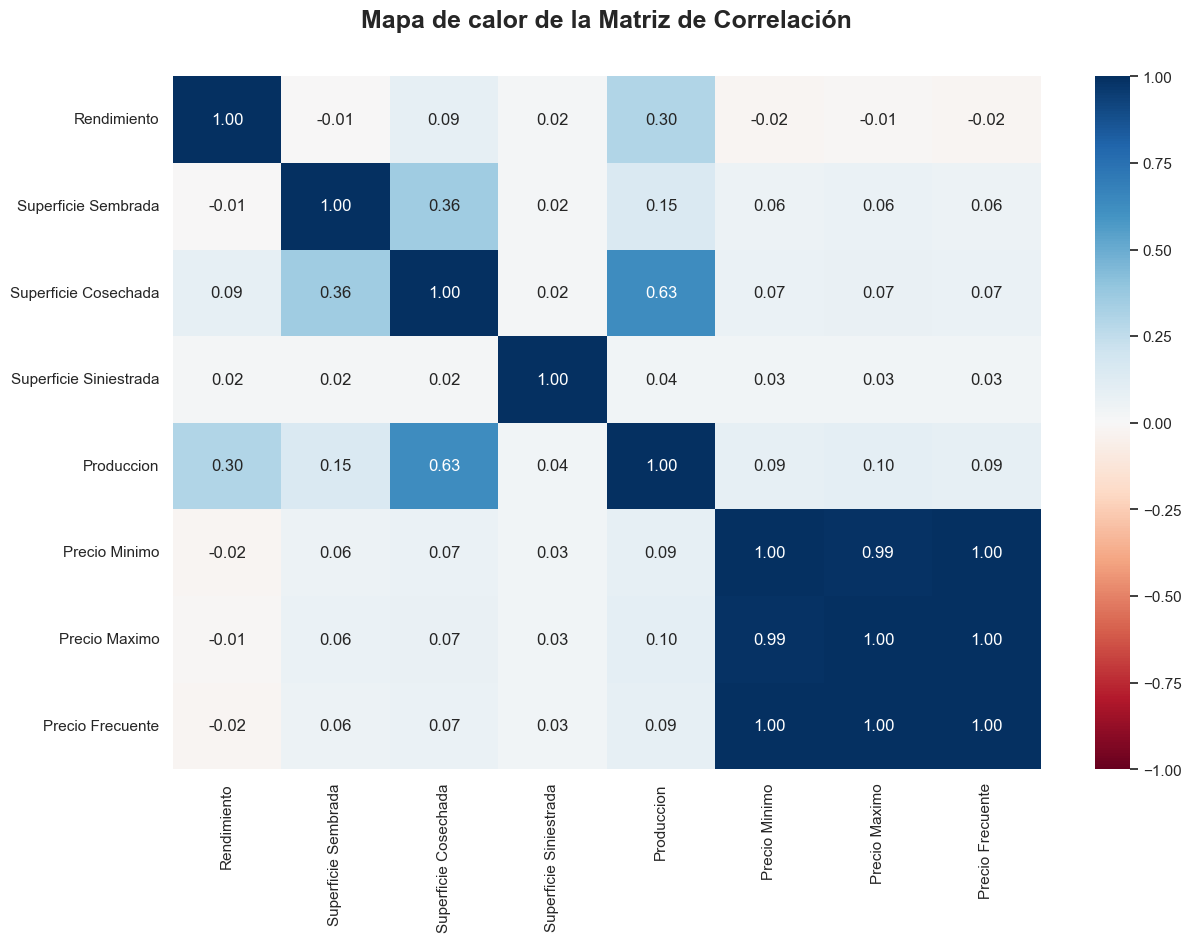

In [41]:
# Calcula la matriz de correlación
correlation_matrix = df_merge.drop(columns=['Año', 'Mes', 'Entidad', 'Cultivo', 'Superficie Sembrada Acumulada','Superficie Cosechada Acumulada', 'Superficie Siniestrada Acumulada', 'Produccion Acumulada']).corr()

# Fijar estilo
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (14,9))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de la Matriz de Correlación', pad=40, ha='center', va='center', fontsize=18, fontweight='bold')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

#Mostrar gráfica
plt.show()

## Gráficas para contar una historia

### Patrones de los cultivos en los que Sonora es el estado con mayor producción: Uva, Calabacita, Sandía, Papa y Espárrago. 

In [42]:
#SIAP mensual

# Sumamos los valores de todos los municipios y estados, agrupados por año, mes y cultivo
df_siap_año_mes_cult_est = df_siap.groupby(['Año', 'Mes', 'Cultivo', 'Entidad'])[VARIABLES_NUMERICAS_SIAP[:5]].sum().reset_index()

#SIAP acumulado

# Sumamos los valores de todos los municipios y estados, agrupados por año, mes y cultivo
df_siap_año_mes_cult_cum_est = df_siap.groupby(['Año', 'Mes', 'Cultivo', 'Entidad'])[VARIABLES_NUMERICAS_SIAP[4:]].sum().reset_index()

# SNIIM mensual

df_sniim_año_mes_cult_est = df_sniim.groupby(['Año', 'Mes', 'Cultivo SIAP', 'Origen'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

In [43]:
# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico según el cultivo, variable y estado seleccionados
def update_plot(cultivo, variable, estado):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Seleccionar el DataFrame correspondiente según la variable
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_año_mes_cult_est
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_año_mes_cult_est
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            data = data[data['Entidad' if 'Entidad' in data.columns else 'Origen'] == estado]

        # Graficar la producción promedio de todos los cultivos
        sns.barplot(x='Mes', y=variable, hue='Año', data=data, palette=COLORES, ci=False, estimator='mean', order=MESES_CRONOLOGICO)
        title = f'{variable} promedio de Todos los Cultivos'
        if estado != 'Todos los estados':
            title += f' en {estado}'
    else:
        # Seleccionar el DataFrame correspondiente según el variable y cultivo
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_año_mes_cult_est[df_siap_año_mes_cult_est['Cultivo'] == cultivo]
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_año_mes_cult_est[df_sniim_año_mes_cult_est['Cultivo SIAP'] == cultivo]
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            data = data[data['Entidad' if 'Entidad' in data.columns else 'Origen'] == estado]

        # Graficar la producción del cultivo seleccionado
        sns.barplot(x='Mes', y=variable, hue='Año', data=data, palette=COLORES, ci=False, order=MESES_CRONOLOGICO)
        title = f'{variable} de {cultivo}'
        if estado != 'Todos los estados':
            title += f' en {estado}'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')

    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Añadir la opción "Todos los cultivos" a la lista de cultivos
cultivos_unicos = ['Todos los cultivos'] + CULTIVOS_UNICOS

# Obtener la lista única de estados
estados_unicos = ['Todos los estados'] + ESTADOS_UNICOS

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Produccion', description='Variable')
estado_selector = widgets.Dropdown(options=estados_unicos, value='Todos los estados', description='Estado')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector, estado=estado_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable, estado)>

In [56]:
# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico según el cultivo, variable y estado seleccionados
def update_plot(cultivo, variable, estado):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Filtrar por estado si se selecciona un estado específico
        data = df_siap_año_mes_cult_cum_est
        if estado != 'Todos los estados':
            data = data[data['Entidad'] == estado]

        # Graficar la producción promedio de todos los cultivos
        sns.barplot(x='Mes', y=variable, hue='Año', data=data, palette=COLORES, ci=False, estimator='mean', order=MESES_CRONOLOGICO)
        title = f'{variable} Promedio de Todos los Cultivos'
        if estado != 'Todos los estados':
            title += f' en {estado}'
    else:
        # Filtrar por estado si se selecciona un estado específico
        data = df_siap_año_mes_cult_cum_est[df_siap_año_mes_cult_cum_est['Cultivo'] == cultivo]
        if estado != 'Todos los estados':
            data = data[data['Entidad'] == estado]

        # Graficar la producción del cultivo seleccionado
        sns.barplot(x='Mes', y=variable, hue='Año', data=data, palette=COLORES, ci=False, order=MESES_CRONOLOGICO)
        title = f'{variable} de {cultivo}'
        if estado != 'Todos los estados':
            title += f' en {estado}'

    # Añadir título y etiquetas a los ejes
    plt.title(title)
    plt.xlabel('Mes')

    # Añadir label y dinámico al eje y
    plt.ylabel(get_label(variable))

    # Mostrar la leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mostrar el gráfico
    plt.show()

# Obtener la lista única de estados
estados_unicos = ['Todos los estados'] + ESTADOS_UNICOS
# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[4:], value='Produccion Acumulada', description='Variable')
estado_selector = widgets.Dropdown(options=estados_unicos, value='Todos los estados', description='Estado')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector, estado=estado_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable, estado)>

In [45]:
# Promediar los valores entre todos los años
df_siap_promedio_anual_est = df_siap_año_mes_cult_est.groupby(['Mes', 'Entidad'])[VARIABLES_NUMERICAS_SIAP[:5]].mean().reset_index()
df_sniim_promedio_anual_est = df_sniim_año_mes_cult_est.groupby(['Mes', 'Origen'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

# Fijamos estilo
sns.set_style("white")

# Función para actualizar el gráfico de barras horizontales según la variable, el cultivo y el estado seleccionados
def update_plot(cultivo, variable, estado):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Seleccionar el DataFrame correspondiente según la variable
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_promedio_anual_est
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_promedio_anual_est
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            data = data[data['Entidad' if 'Entidad' in data.columns else 'Origen'] == estado]

        # Graficar barras horizontales para el promedio de todos los cultivos
        order = data.groupby('Mes')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=data, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para todos los cultivos'
        if estado != 'Todos los estados':
            title += f' en {estado}'
    else:
        # Seleccionar el DataFrame correspondiente según la variable y cultivo
        if variable in VARIABLES_NUMERICAS_SIAP:
            data = df_siap_año_mes_cult_est[df_siap_año_mes_cult_est['Cultivo'] == cultivo]
            data = data.groupby(['Mes', 'Entidad'])[VARIABLES_NUMERICAS_SIAP[:5]].mean().reset_index()
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            data = df_sniim_año_mes_cult_est[(df_sniim_año_mes_cult_est['Cultivo SIAP'] == cultivo)]
            data = data.groupby(['Mes', 'Origen'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()
        else:
            # Manejar el caso en que la variable no pertenezca a ninguno de los dos DataFrames
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            data = data[data['Entidad' if 'Entidad' in data.columns else 'Origen'] == estado]

        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = data.groupby(['Mes'])[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Mes', data=data, ci=False, palette=color_palette, order=order)
        title = f'Promedio anual de {variable} para {cultivo}'
        if estado != 'Todos los estados':
            title += f' en {estado}'

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Anual')
    plt.ylabel('Mes')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Obtener la lista única de estados
estados_unicos = ['Todos los estados'] + ESTADOS_UNICOS

# Crear los widgets de selección
cultivo_selector = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
variable_selector = widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:4] + VARIABLES_NUMERICAS_SNIIM, value='Produccion', description='Variable')
estado_selector = widgets.Dropdown(options=estados_unicos, value='Todos los estados', description='Estado')

# Crear la interfaz interactiva
interact(update_plot, cultivo=cultivo_selector, variable=variable_selector, estado=estado_selector)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.update_plot(cultivo, variable, estado)>

In [47]:
# Creamos una copia de nuestros DataFrames
df_siap_fechas = df_siap.copy()
df_sniim_fechas = df_sniim.copy()

# Asegúrate de tener las columnas Año y Mes en formato string y maneja NaN
df_siap_fechas['Año'] = df_siap_fechas['Año'].astype(str)
df_siap_fechas['Mes'] = df_siap_fechas['Mes'].astype(str)
df_sniim_fechas['Año'] = df_sniim_fechas['Año'].astype(str)
df_sniim_fechas['Mes'] = df_sniim_fechas['Mes'].astype(str)

# Mapea los nombres de los meses a números
meses_dict = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Mapea los nombres de los meses a números
df_siap_fechas['Mes'] = df_siap_fechas['Mes'].map(meses_dict)
df_sniim_fechas['Mes'] = df_sniim_fechas['Mes'].map(meses_dict)

# Combina las columnas Año y Mes en una nueva columna 'Fecha'
df_siap_fechas['Fecha'] = pd.to_datetime(df_siap_fechas['Año'] + '-' + df_siap_fechas['Mes'].astype(str), format='%Y-%m')
df_sniim_fechas['Fecha'] = pd.to_datetime(df_sniim_fechas['Año'] + '-' + df_sniim_fechas['Mes'].astype(str), format='%Y-%m')

# Agrupa por mes y año y calcula el promedio de las columnas numéricas
df_siap_grouped_est = df_siap_fechas.groupby(['Fecha', 'Cultivo', 'Entidad'])[VARIABLES_NUMERICAS_SIAP[:5]].mean().reset_index()
df_sniim_grouped_est = df_sniim_fechas.groupby(['Fecha', 'Cultivo SIAP', 'Origen'])[VARIABLES_NUMERICAS_SNIIM].mean().reset_index()

# Filtra los datos para el rango de fechas que deseas
start_date = '2019-12-25'
end_date = '2023-09-10'
df_siap_filtered_est = df_siap_grouped_est[(df_siap_grouped_est['Fecha'] >= start_date) & (df_siap_grouped_est['Fecha'] <= end_date)]
df_sniim_filtered_est = df_sniim_grouped_est[(df_sniim_grouped_est['Fecha'] >= start_date) & (df_sniim_grouped_est['Fecha'] <= end_date)]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import pandas as pd

# Fijamos estilo
sns.set_style("white")

# Función para graficar
def plot_graph(cultivo, variable, estado):
    plt.subplots(1, 1, figsize=(12, 8))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable para todos los cultivos
        if variable in VARIABLES_NUMERICAS_SIAP:
            df_all_cultivos_var = df_siap_filtered_est.groupby(['Fecha', 'Entidad'])[variable].mean().reset_index()
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            df_all_cultivos_var = df_sniim_filtered_est.groupby(['Fecha', 'Origen'])[variable].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable} no es válida.")
            
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            df_all_cultivos_var = df_all_cultivos_var[df_all_cultivos_var['Entidad' if 'Entidad' in df_all_cultivos_var.columns else 'Origen'] == estado]

        if estado == 'Todos los estados':
            # Calcular el promedio para cada fecha
            df_all_cultivos_var = df_all_cultivos_var.groupby('Fecha')[variable].mean().reset_index()

        # Asignar colores según la lista COLORES
        unique_years = df_all_cultivos_var['Fecha'].dt.year.unique()
        color_palette = COLORES[:len(unique_years)]
        
        for i, year in enumerate(unique_years):
            df_year = df_all_cultivos_var[df_all_cultivos_var['Fecha'].dt.year.isin((year, year+1))]
            plt.plot(df_year['Fecha'], df_year[variable], marker='o', linestyle='-', color=color_palette[i], label=f'{year}')

        # Añadir título
        plt.title(f'{variable} de todos los cultivos', pad=30, fontsize=16, fontweight='bold', va='center')

    else:
        # Filtra por el cultivo seleccionado y utiliza el DataFrame correspondiente
        if variable in VARIABLES_NUMERICAS_SIAP:
            df_cultivo = df_siap_filtered_est[(df_siap_filtered_est['Cultivo'] == cultivo)]
        elif variable in VARIABLES_NUMERICAS_SNIIM:
            df_cultivo = df_sniim_filtered_est[(df_sniim_filtered_est['Cultivo SIAP'] == cultivo)]
        else:
            raise ValueError(f"La variable {variable} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            df_cultivo = df_cultivo[df_cultivo['Entidad' if 'Entidad' in df_cultivo.columns else 'Origen'] == estado]

        if estado == 'Todos los estados':
            # Calcular el promedio para cada fecha
            df_cultivo = df_cultivo.groupby('Fecha')[variable].mean().reset_index()
        
        # Asignar colores según la lista COLORES
        unique_years = df_cultivo['Fecha'].dt.year.unique()
        color_palette = COLORES[:len(unique_years)]
        
        for i, year in enumerate(unique_years):
            df_year = df_cultivo[df_cultivo['Fecha'].dt.year.isin((year, year+1))]
            plt.plot(df_year['Fecha'], df_year[variable], marker='o', linestyle='-', color=color_palette[i], label=f'{year}')
        
        # Añadir título
        plt.title(f'{variable} de {cultivo}', pad=30)

    # Etiquetas para el eje y
    plt.ylabel(get_label(variable), labelpad=20)

    plt.xlabel('Fecha', labelpad=20)
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
    
    # Añadir leyenda
    plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# Obtener la lista única de estados
estados_unicos = ['Todos los estados'] + list(set(df_siap_grouped_est['Entidad']).union(set(df_sniim_grouped_est['Origen'])))

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable=widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:5] + VARIABLES_NUMERICAS_SNIIM, value='Superficie Sembrada', description='Variable'),
         estado=widgets.Dropdown(options=estados_unicos, value='Todos los estados', description='Estado'))


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable, estado)>

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import pandas as pd

# Fijamos estilo
sns.set_style("white")

# Definir el rango del eje x
start_date = '2020-01'
end_date = '2023-09'

# Función para graficar
def plot_graph(cultivo, variable1, variable2, estado):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    
    if cultivo == 'Todos los cultivos':
        # Grafica el promedio de la variable1 para todos los cultivos
        if variable1 in VARIABLES_NUMERICAS_SIAP:
            df_all_cultivos_var1 = df_siap_filtered_est.groupby(['Fecha', 'Entidad'])[variable1].mean().reset_index()
        elif variable1 in VARIABLES_NUMERICAS_SNIIM:
            df_all_cultivos_var1 = df_sniim_filtered_est.groupby(['Fecha', 'Origen'])[variable1].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable1} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            df_all_cultivos_var1 = df_all_cultivos_var1[df_all_cultivos_var1['Entidad' if 'Entidad' in df_all_cultivos_var1.columns else 'Origen'] == estado]

        # Asignar colores a cada año
        for i, year in enumerate(df_all_cultivos_var1['Fecha'].dt.year.unique()):
            df_year = df_all_cultivos_var1[df_all_cultivos_var1['Fecha'].dt.year.isin((year, year + 1))]
            axs[0].plot(df_year['Fecha'], df_year[variable1], marker='o', linestyle='-', color=COLORES[i], label=f'{year}')

        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Grafica el promedio de la variable2 para todos los cultivos
        if variable2 in VARIABLES_NUMERICAS_SIAP:
            df_all_cultivos_var2 = df_siap_filtered_est.groupby(['Fecha', 'Entidad'])[variable2].mean().reset_index()
        elif variable2 in VARIABLES_NUMERICAS_SNIIM:
            df_all_cultivos_var2 = df_sniim_filtered_est.groupby(['Fecha', 'Origen'])[variable2].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable2} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            df_all_cultivos_var2 = df_all_cultivos_var2[df_all_cultivos_var2['Entidad' if 'Entidad' in df_all_cultivos_var2.columns else 'Origen'] == estado]

        # Asignar colores a cada año
        for i, year in enumerate(df_all_cultivos_var2['Fecha'].dt.year.unique()):
            df_year = df_all_cultivos_var2[df_all_cultivos_var2['Fecha'].dt.year.isin((year, year + 1))]
            axs[1].plot(df_year['Fecha'], df_year[variable2], marker='o', linestyle='-', color=COLORES[i], label='_')

        axs[1].legend(loc='upper right')
        
        # Calcular la correlación
        corr_value = df_all_cultivos_var1[variable1].corr(df_all_cultivos_var2[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.505, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=18, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    else:
        # Filtra por el cultivo seleccionado
        if variable1 in VARIABLES_NUMERICAS_SIAP:
            df_cultivo_var1 = df_siap_filtered_est[(df_siap_filtered_est['Cultivo'] == cultivo)].groupby(['Fecha', 'Entidad'])[variable1].mean().reset_index()
        elif variable1 in VARIABLES_NUMERICAS_SNIIM:
            df_cultivo_var1 = df_sniim_filtered_est[(df_sniim_filtered_est['Cultivo SIAP'] == cultivo)].groupby(['Fecha', 'Origen'])[variable1].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable1} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            df_cultivo_var1 = df_cultivo_var1[df_cultivo_var1['Entidad' if 'Entidad' in df_cultivo_var1.columns else 'Origen'] == estado]
        
        # Asignar colores a cada año
        for i, year in enumerate(df_cultivo_var1['Fecha'].dt.year.unique()):
            df_year = df_cultivo_var1[df_cultivo_var1['Fecha'].dt.year.isin((year, year + 1))]
            axs[0].plot(df_year['Fecha'], df_year[variable1], marker='o', linestyle='-', color=COLORES[i], label=f'{year}')

        axs[0].legend(loc='upper right')
        axs[0].set_xticks([])  # Elimina las marcas del eje x
        
        # Filtra por el cultivo seleccionado
        if variable2 in VARIABLES_NUMERICAS_SIAP:
            df_cultivo_var2 = df_siap_filtered_est[(df_siap_filtered_est['Cultivo'] == cultivo)].groupby(['Fecha', 'Entidad'])[variable2].mean().reset_index()
        elif variable2 in VARIABLES_NUMERICAS_SNIIM:
            df_cultivo_var2 = df_sniim_filtered_est[(df_sniim_filtered_est['Cultivo SIAP'] == cultivo)].groupby(['Fecha', 'Origen'])[variable2].mean().reset_index()
        else:
            raise ValueError(f"La variable {variable2} no es válida.")
        
        # Filtrar por estado si se selecciona un estado específico
        if estado != 'Todos los estados':
            df_cultivo_var2 = df_cultivo_var2[df_cultivo_var2['Entidad' if 'Entidad' in df_cultivo_var2.columns else 'Origen'] == estado]
        
        # Asignar colores a cada año
        for i, year in enumerate(df_cultivo_var2['Fecha'].dt.year.unique()):
            df_year = df_cultivo_var2[df_cultivo_var2['Fecha'].dt.year.isin((year, year + 1))]
            axs[1].plot(df_year['Fecha'], df_year[variable2], marker='o', linestyle='-', color=COLORES[i], label='_')
        
        axs[1].legend(loc='upper right')

        # Calcular la correlación
        corr_value = df_cultivo_var1[variable1].corr(df_cultivo_var2[variable2])
        # Añadir el valor de correlación como texto en la figura
        fig.text(1.07, 0.515, f'Corr: {corr_value:.2f}', ha='center', va='center', fontsize=14, fontweight='bold')

        # Añadir título superior
        suptitle = f'{variable1} vs {variable2} de {cultivo}'
        suptitle_obj = fig.suptitle(suptitle, fontsize=16, fontweight='bold', va='center')
        # Ajustar la posición vertical del título superior
        suptitle_obj.set_y(1)

    # Etiquetas para el eje y
    axs[0].set_ylabel(get_label(variable1))
    axs[1].set_ylabel(get_label(variable2))

    plt.xlabel('Fecha')
    plt.tight_layout()
    
    # Fijar el rango del eje x
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
        
    plt.show()

# Obtener la lista única de estados
estados_unicos = ['Todos los estados'] + list(set(df_siap_filtered_est['Entidad']).union(set(df_sniim_filtered_est['Origen'])))

# Crea los widgets interactivos
interact(plot_graph, 
         cultivo=widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo'),
         variable1=widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:5] + VARIABLES_NUMERICAS_SNIIM, value='Superficie Sembrada', description='Variable 1'),
         variable2=widgets.Dropdown(options=VARIABLES_NUMERICAS_SIAP[:5] + VARIABLES_NUMERICAS_SNIIM, value='Superficie Cosechada', description='Variable 2'),
         estado=widgets.Dropdown(options=estados_unicos, value='Todos los estados', description='Estado'))


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_graph(cultivo, variable1, variable2, estado)>

In [50]:
# Función para graficar el mapa
def plot_map(cultivo_seleccionado, variable_seleccionada_siap, variable_seleccionada_sniim):
    # Mapa izquierdo (siap)
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_siap = df_geo.merge(df_siap_año_est_cult.groupby('Entidad')[variable_seleccionada_siap].mean().reset_index(), left_on='name', right_on='Entidad', how='left')
    else:
        gdf_cultivo = df_siap_año_est_cult[df_siap_año_est_cult['Cultivo'] == cultivo_seleccionado]
        gdf_siap = df_geo.merge(gdf_cultivo, left_on='name', right_on='Entidad', how='left')

    # Rellenar los valores nulos con 0
    gdf_siap[variable_seleccionada_siap] = gdf_siap[variable_seleccionada_siap].fillna(0)

    # Crear un mapa de calor con escala ajustada
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    # Verificar si se trata de 'Todos los cultivos'
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_siap.plot(column=variable_seleccionada_siap, ax=ax[0], legend=True, cmap='YlOrRd')
    else:
        gdf_siap.plot(column=variable_seleccionada_siap, ax=ax[0], legend=True, cmap='YlOrRd')

    # Dibujar las fronteras del GeoDataFrame con bordes negros y delgados
    gdf_siap.boundary.plot(ax=ax[0], color='black', linewidth=0.5)

    # Personalizar el mapa
    ax[0].set_title(f"{variable_seleccionada_siap} por estado ({cultivo_seleccionado})")
    ax[0].set_axis_off()

    # Añadir leyenda si existe
    legend_siap = ax[0].get_legend()
    if legend_siap:
        legend_siap.set_title(variable_seleccionada_siap)

    # Mapa derecho (sniim)
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_sniim = df_geo.merge(df_sniim_año_est_cult.groupby('Origen')[variable_seleccionada_sniim].mean().reset_index(), left_on='name', right_on='Origen', how='left')
    else:
        gdf_cultivo_sniim = df_sniim_año_est_cult[df_sniim_año_est_cult['Cultivo SIAP'] == cultivo_seleccionado]
        gdf_sniim = df_geo.merge(gdf_cultivo_sniim, left_on='name', right_on='Origen', how='left')

    # Rellenar los valores nulos con 0
    gdf_sniim[variable_seleccionada_sniim] = gdf_sniim[variable_seleccionada_sniim].fillna(0)

    # Verificar si se trata de 'Todos los cultivos'
    if cultivo_seleccionado == 'Todos los cultivos':
        gdf_sniim.plot(column=variable_seleccionada_sniim, ax=ax[1], legend=True, cmap='YlOrRd')
    else:
        gdf_sniim.plot(column=variable_seleccionada_sniim, ax=ax[1], legend=True, cmap='YlOrRd')

    # Dibujar las fronteras del GeoDataFrame con bordes negros y delgados
    gdf_sniim.boundary.plot(ax=ax[1], color='black', linewidth=0.5)

    # Personalizar el mapa
    ax[1].set_title(f"{variable_seleccionada_sniim} por estado ({cultivo_seleccionado})")
    ax[1].set_axis_off()

    # Añadir leyenda si existe
    legend_sniim = ax[1].get_legend()
    if legend_sniim:
        legend_sniim.set_title(variable_seleccionada_sniim)

    # Añadir título superior a la figura
    plt.suptitle("Comparación de Variables SIAP vs SNIIM por estado", fontsize=16, y=1)

    # Mostrar el mapa
    plt.show()

# Crear los widgets interactivos
widget_cultivo = widgets.Dropdown(options=cultivos_unicos, value='Todos los cultivos', description='Cultivo')
widget_variable_siap = widgets.Dropdown(options=variables_siap_anual, value="Produccion Anual", description='SIAP')
widget_variable_sniim = widgets.Dropdown(options=variables_sniim_anual, value="Precio Frecuente Anual", description='SNIIM')

# Crear el widget interactivo
interact(plot_map, 
         cultivo_seleccionado=widget_cultivo,
         variable_seleccionada_siap=widget_variable_siap,
         variable_seleccionada_sniim=widget_variable_sniim)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

<function __main__.plot_map(cultivo_seleccionado, variable_seleccionada_siap, variable_seleccionada_sniim)>

In [51]:
# Función para actualizar el gráfico de barras horizontales según la variable y el cultivo seleccionados
def update_plot_año_entidad(cultivo, variable):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        if variable in variables_sniim_anual:
            # Seleccionar el DataFrame correspondiente según la variable
            data = df_sniim_año_est_cult.groupby('Origen')[variables_sniim_anual].mean().reset_index()

            # Graficar barras horizontales para el promedio de todos los cultivos
            order = data.groupby('Origen')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Origen', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de todos los cultivos por entidad'

        elif variable in variables_siap_anual:
            # Seleccionar el DataFrame correspondiente según la variable
            data = df_siap_año_est_cult.groupby('Entidad')[variables_siap_anual].mean().reset_index()

            # Graficar barras horizontales para el promedio de todos los cultivos
            order = data.groupby('Entidad')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Entidad', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de todos los cultivos por entidad'

        else:
            raise ValueError(f"La variable {variable} no es válida.")
    else:
        if variable in variables_sniim_anual:
            # Seleccionar el DataFrame correspondiente según la variable y cultivo
            data = df_sniim_año_est_cult[df_sniim_año_est_cult['Cultivo SIAP'] == cultivo]

            # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
            order = data.groupby('Origen')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Origen', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de {cultivo} por entidad'

        elif variable in variables_siap_anual:
            # Seleccionar el DataFrame correspondiente según la variable y cultivo
            data = df_siap_año_est_cult[(df_siap_año_est_cult['Cultivo'] == cultivo)]

            # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
            order = data.groupby('Entidad')[variable].mean().sort_values(ascending=False).index
            color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
            ax = sns.barplot(x=variable, y='Entidad', data=data, ci=False, palette=color_palette, order=order)
            title = f'{variable} promedio de {cultivo} por entidad'

        else:
            raise ValueError(f"La variable {variable} no es válida.")

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Anual')
    plt.ylabel('Entidad')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear los widgets de selección
cultivo_selector_año_entidad = widgets.Dropdown(options=['Todos los cultivos'] + list(df_siap_año_est_cult['Cultivo'].unique()), 
                                                value='Todos los cultivos', description='Cultivo')
variable_selector_año_entidad = widgets.Dropdown(options=variables_sniim_anual + variables_siap_anual, value='Produccion Anual', description='Variable')

# Crear la interfaz interactiva
interact(update_plot_año_entidad, cultivo=cultivo_selector_año_entidad, 
         variable=variable_selector_año_entidad)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Brócoli', 'Cebolla', 'Ch…

<function __main__.update_plot_año_entidad(cultivo, variable)>

In [58]:
import pandas as pd
import plotly.express as px
from ipywidgets import widgets, interact

# Obtener la lista única de estados
estados_unicos = ['Todos los estados'] + df_siap_est_mun_cult['Entidad'].unique().tolist()

# Función para graficar el treemap
def plot_treemap(cultivo_seleccionado, variable_seleccionada, estado_seleccionado):
    if cultivo_seleccionado == 'Todos los cultivos':
        df_filtered = df_siap_est_mun_cult.groupby(['Entidad', 'Municipio'])[variable_seleccionada].mean().reset_index()
        title = f'Treemap: {variable_seleccionada} promedio de todos los cultivos'
    else:
        df_filtered = df_siap_est_mun_cult[df_siap_est_mun_cult['Cultivo'] == cultivo_seleccionado]
        title = f'Treemap: {variable_seleccionada} promedio de {cultivo_seleccionado}'

    # Filtrar por estado si no es "Todos los estados"
    if estado_seleccionado != 'Todos los estados':
        df_filtered = df_filtered[df_filtered['Entidad'] == estado_seleccionado]

    # Crear el treemap con plotly express
    fig = px.treemap(df_filtered,
                     path=['Entidad', 'Municipio'],
                     values=variable_seleccionada,
                     title=title,
                     width=1000, height=800)

    return fig

# Crear los widgets interactivos
widget_cultivo = widgets.Dropdown(options=['Todos los cultivos'] + CULTIVOS_UNICOS, value='Todos los cultivos', description='Cultivo')
widget_variable = widgets.Dropdown(options=variables_siap_anual, value='Superficie Cosechada Anual', description='Variable')
widget_estado = widgets.Dropdown(options=estados_unicos, value='Sonora', description='Estado')

# Mostrar el widget interactivo
@interact(cultivo_seleccionado=widget_cultivo, variable_seleccionada=widget_variable, estado_seleccionado=widget_estado)
def update_plot(cultivo_seleccionado, variable_seleccionada, estado_seleccionado):
    # Actualizar el treemap
    fig = plot_treemap(cultivo_seleccionado, variable_seleccionada, estado_seleccionado)
    # Mostrar el treemap
    display(fig)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Berenjena', 'Brócoli', '…

In [53]:
# Función para actualizar el gráfico de barras horizontales según el cultivo, la variable y el estado seleccionados
def update_plot_siap_est_mun(cultivo, variable, estado):
    plt.figure(figsize=(12, 8))

    if cultivo == 'Todos los cultivos':
        # Seleccionar el DataFrame correspondiente según la variable y el estado
        data = df_siap_est_mun_cult[df_siap_est_mun_cult['Entidad'] == estado]
        
        # Filtrar para mostrar solo los primeros 20 municipios
        municipios_top20 = data['Municipio'].value_counts().nlargest(20).index
        data = data[data['Municipio'].isin(municipios_top20)]
        
        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = data.groupby('Municipio')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Municipio', data=data, ci=False, palette=color_palette, order=order)
        title = f'Promedio de {variable} para {estado} - {cultivo} por municipio (Top 20)'
    else:
        # Seleccionar el DataFrame correspondiente según el cultivo, la variable y el estado
        data = df_siap_est_mun_cult[(df_siap_est_mun_cult['Cultivo'] == cultivo) & (df_siap_est_mun_cult['Entidad'] == estado)]
        
        # Filtrar para mostrar solo los primeros 20 municipios
        municipios_top20 = data['Municipio'].value_counts().nlargest(20).index
        data = data[data['Municipio'].isin(municipios_top20)]
        
        # Graficar barras horizontales y ordenar los datos directamente en la función de graficado
        order = data.groupby('Municipio')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Municipio', data=data, ci=False, palette=color_palette, order=order)
        title = f'{variable} para {estado} - {cultivo} por municipio (Top 20)'

    # Añadir título y etiquetas a los ejes
    plt.title(title, pad=20)
    plt.xlabel(f'{variable} Promedio Acumulado')
    plt.ylabel('Municipio')

    # Añadir label x dinámico
    plt.xlabel(get_label(variable))

    # Eliminar bordes
    plt.gca().spines['left'].set_visible(False)  # Izquierdo
    plt.gca().spines['top'].set_visible(False)   # Superior
    plt.gca().spines['right'].set_visible(False) # Derecho
    plt.gca().spines['bottom'].set_visible(False) # Inferior

    # Eliminar xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear los widgets de selección
cultivo_selector_siap_est_mun = widgets.Dropdown(options=['Todos los cultivos'] + list(df_siap_est_mun_cult['Cultivo'].unique()), 
                                                 value='Todos los cultivos', description='Cultivo')
variable_selector_siap_est_mun = widgets.Dropdown(options=variables_siap_anual, 
                                                   value='Produccion Anual', description='Variable')
estado_selector_siap_est_mun = widgets.Dropdown(options=list(df_siap_est_mun_cult['Entidad'].unique()), 
                                                 value=df_siap_est_mun_cult['Entidad'].unique()[0], description='Estado')

# Crear la interfaz interactiva
interact(update_plot_siap_est_mun, cultivo=cultivo_selector_siap_est_mun, 
         variable=variable_selector_siap_est_mun, estado=estado_selector_siap_est_mun)


interactive(children=(Dropdown(description='Cultivo', options=('Todos los cultivos', 'Brócoli', 'Chile verde',…

<function __main__.update_plot_siap_est_mun(cultivo, variable, estado)>

In [54]:
# Crear los widgets de selección
estado_selector = widgets.Dropdown(options=['Todos los estados'] + list(ESTADOS_UNICOS),
                                    value='Todos los estados', description='Estado')
variable_selector = widgets.Dropdown(options=variables_siap_anual + variables_sniim_anual,
                                      value='Produccion Anual', description='Variable')
año_selector = widgets.Dropdown(options=['Todos los años'] + list(AÑOS_UNICOS),
                                 value='Todos los años', description='Año')

# Función para actualizar el gráfico según las selecciones en los widgets
def update_plot(estado, variable, año):
    plt.figure(figsize=(12, 8))

    # Filtrar el DataFrame según las selecciones en los widgets
    if variable in variables_siap_anual:
        df_filtered = df_siap_año_est_cult
    else:
        df_filtered = df_sniim_año_est_cult

    if estado != 'Todos los estados':
        if variable in variables_siap_anual:
            df_filtered = df_filtered[df_filtered['Entidad'] == estado]
        else: 
            df_filtered = df_filtered[df_filtered['Origen'] == estado]

    if año != 'Todos los años':
        df_filtered = df_filtered[df_filtered['Año'] == año]

    # Seleccionar el DataFrame correspondiente según la variable
    if variable in variables_siap_anual:
        data = df_filtered.groupby('Cultivo')[variable].mean().reset_index()
        # Graficar barras horizontales y ordenar los datos descendentemente
        order = data.groupby('Cultivo')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Cultivo', data=data, ci=False, palette=color_palette, order=order)
    else:
        data = df_filtered.groupby('Cultivo SIAP')[variable].mean().reset_index()
        # Graficar barras horizontales y ordenar los datos descendentemente
        order = data.groupby('Cultivo SIAP')[variable].mean().sort_values(ascending=False).index
        color_palette = ['limegreen' if i < 3 else 'lightcoral' if i == len(order) - 1 else 'lightgrey' for i in range(len(order))]
        ax = sns.barplot(x=variable, y='Cultivo SIAP', data=data, ci=False, palette=color_palette, order=order)

    # Añadir título y etiquetas a los ejes
    plt.title(f'{variable} por cultivo', pad=20)
    plt.xlabel(get_label(variable))
    plt.ylabel('Cultivo')

    # Estilo adicional
    sns.despine(left=True, bottom=True)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.xticks([])  # Eliminar xticks
    plt.yticks(fontsize=10)  # Ajustar el tamaño de yticks

    # Añadir valores en la parte superior de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')

    # Mostrar el gráfico
    plt.show()

# Crear la interfaz interactiva
interact(update_plot, estado=estado_selector, variable=variable_selector, año=año_selector)



interactive(children=(Dropdown(description='Estado', options=('Todos los estados', 'Baja California Sur', 'Mor…

<function __main__.update_plot(estado, variable, año)>